In [1]:
import math
import numpy as np
import Danish as Aztec

In [2]:
def e_(face, edge) : # e'
    edges = face.edges
    i = edges.index(edge)
    return edges[(i + 2) % 4]

In [36]:
def weight_computation(grid) :
    n = grid.n
    for k in range(1, n + 1) :
        #Ak = grid.get_Am(k)
        for face in list(grid.faces.values()):
            (i, j) = face.bottom_left
            if (i + j - k) % 2 == 0 :
                #print(str(i) + ' ' + str(j) + ' ' + str(k))
                e1 = face.edges[0]      # Edges are in anticlockwise order so two consecutive edges are adjacent
                e2 = face.edges[1]


                alpha = e_(face, e1).w[-1]
                gamma = e1.w[-1]
                beta = e2.w[-1]
                delta = e_(face, e2).w[-1]

                DP = alpha*gamma + beta*gamma
                
                if (DP != 0) :
                    e_(face, e1).w.append(gamma / DP)
                    e1.w.append(alpha / DP)
                    e2.w.append(delta / DP)
                    e_(face, e2).w.append(beta / DP)
                elif alpha + beta != 0 :
                    e1.w.append(alpha)
                    e_(face, e1).w.append(1 / (alpha + beta))
                    e2.w.append(1 / (alpha + beta))
                    e_(face, e1).w.append(beta)
                elif delta + gamma != 0 :
                    e1.w.append(1 / (delta + gamma))
                    e_(face, e1).w.append(gamma)
                    e2.w.append(delta)
                    e_(face, e2).w.append(1 / (delta + gamma))
                    

                face.DP.append(DP)

In [59]:

def generate_matching(grid) :
    n = grid.n
    rng = np.random.default_rng(seed=42)
    M = dict()
    for k in range(1, n + 1) :
        Am = grid.get_Am(k)     #   Get A_k's face
        for face in Am :
             (i, j) = face.bottom_left
             if (i + j - k) % 2 == 0 :
                 # Case 3
                alpha = face.edges[2]
                gamma = face.edges[0]
                beta  = face.edges[1]
                delta = face.edges[3]

                #print(str(i) + ' ' + str(j) + ' ' + str(k))

                #DP = alpha.w[k-1]*gamma.w[k-1] + beta.w[k-1]*delta.w[k-1]

                if not ( (frozenset(alpha.e) in M) or (frozenset(beta.e) in M) or (frozenset(delta.e) in M) or (frozenset(gamma.e) in M) ) :
                     if rng.random() < alpha.w[k-1]*gamma.w[k-1] / face.DP[-1] :
                         M[frozenset(gamma.e)] = gamma
                         M[frozenset(alpha.e)] = alpha
                     else :
                         M[frozenset(delta.e)] = delta
                         M[frozenset(beta.e)] = beta
                 # Case 2
                elif ((frozenset(alpha.e) in M) and (frozenset(gamma.e) in M ) ) : # or ((frozenset(beta.e) in M) or (frozenset(delta.e) in M)) ):
                    del M[frozenset(alpha.e)]
                    del M[frozenset(gamma.e)]
                elif ((frozenset(beta.e) in M) and (frozenset(delta.e) in M ) ) :
                    del M[frozenset(beta.e)]
                    del M[frozenset(delta.e)]
                 # Case 3
                elif (frozenset(alpha.e) in M) :
                    del M[frozenset(alpha.e)]
                    M[frozenset(gamma.e)] = gamma
                elif (frozenset(gamma.e) in M) :
                    del M[frozenset(gamma.e)]
                    M[frozenset(alpha.e)] = alpha
                elif (frozenset(beta.e) in M) :
                    del M[frozenset(beta.e)]
                    M[frozenset(delta.e)] = delta
                elif (frozenset(delta.e) in M) :
                    del M[frozenset(delta.e)]
                    M[frozenset(beta.e)] = beta
    return M.values()

In [66]:
grid = Aztec.Diamond(50)
weight_computation(grid)

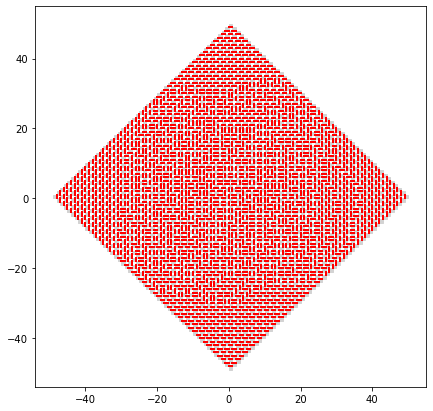

In [67]:
M = generate_matching(grid)
matching = [tuple(edge.e) for edge in M]
grid.plot_board(dotsVisible = False, M = matching)